Initial setup
<br> Note to self: use this notebook to keyphrase extraction software packages

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import wosis
import pandas as pd
import metaknowledge as mk

# Helper functions for plotting
import wosis.analysis.plotting as wos_plot

# Analysis and search functions
from wosis.analysis import (preview_matches, search_records, keyword_matches, 
                            find_pubs_by_authors, preview_matches_by_keyword, get_unique_kw_titles,
                            remove_by_journals, remove_by_title)

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# This just helps make the plots look nicer
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2.0)

In [3]:
# Need config file
wos_config = wosis.load_config('../config/config.yml')

In [4]:
query_id = "756d39801152fe5f5f4ad3a3df9b6a30"
RC = mk.RecordCollection("tmp/{}.txt".format(query_id))

# Remove publications with no DOI
corpora_df = wosis.rc_to_df(RC)
corpora_df, removed_pubs = wosis.constrain.remove_empty_DOIs(corpora_df)

# Create a new metaknowledge collection
filtered_corpora = wosis.extract_recs(corpora_df.loc[:, 'id'], RC, name='Filtered Corpora')

Removing 1799 records with no DOIs


Get papers of interest by identifying the top cited papers

In [5]:
identified_topics = wosis.find_topics(filtered_corpora)

Topic 1: model paramet predict data sensit wa use simul analysi process
Topic 2: design optim optimization shape structur topolog problem element method algorithm
Topic 3: product life impact energi environment cost cycl lca wast cycle
Topic 4: uncertainti uncertainty carlo bayesian model estim paramet mont input propag
Topic 5: risk exposur health assess cancer assessment human hazard contamin concentr
Topic 6: soil wa crop plant moistur content oat contamin carbon concentr
Topic 7: method problem comput stochast random propos solut equat algorithm function
Topic 8: flood climat hydrolog river runoff chang catchment flow basin watersh
Topic 9: emiss air ozon pm sourc concentr pollut nox gas ghg
Topic 10: water qualiti groundwat river irrig manag resourc aquif quality lake


In [6]:
uncert_topic = identified_topics.get_topic_by_id(4)

In [7]:
uncert_topic_rc = wosis.extract_recs(uncert_topic.id, filtered_corpora, name='uncertainty_topic')

In [8]:
# If cache directory is not specified, it will not save results for later re-use
uncert_topic_cites = wosis.get_num_citations(uncert_topic_rc, wos_config, cache_dir='tmp')

In [9]:
uncert_topic_cites[0:10].loc[:, ["AU", "DOI", 'title', 'citations']]

,AU,DOI,title,citations
576,"Refsgaard, Jens Christian|van der Sluijs, Jero...",10.1016/j.envost.2007.02.004,Uncertainty in the environmental modelling pro...,509
328,"Yang, Jing|Reichert, Peter|Abbaspour, K. C.|Xi...",10.1016/j.jhydrol.2008.05.012,Comparing uncertainty analysis techniques for ...,311
488,"Refsgaard, Jens Christian|van der Sluijs, Jero...",10.1016/j.advwatres.2005.11.013,A framework for dealing with uncertainty due t...,246
687,"Pappenberger, F.|Beven, K. J.",10.1029/2005WR004820,Ignorance is bliss: Or seven reasons not to us...,244
568,"Thiemann, M|Trosset, M|Gupta, H|Sorooshian, S",10.1029/2000WR900405,Bayesian recursive parameter estimation for hy...,239
725,"Schoups, Gerrit|Vrugt, Jasper A.",10.1029/2009WR008933,A formal likelihood function for parameter and...,223
642,"Aronica, G|Bates, PD|Horritt, MS",10.1002/hyp.398,Assessing the uncertainty in distributed model...,215
678,"Bjorklund, AE",10.1065/lca2001.12/071,Survey of approaches to improve reliability in...,175
432,"Runge, Michael C.|Converse, Sarah J.|Lyons, Ja...",10.1016/j.biocon.2010.12.020,Which uncertainty? Using expert elicitation an...,169
746,"Roy, Christopher J.|Oberkampf, William L.",10.1016/j.cma.2011.03.016,"A comprehensive framework for verification, va...",167


In [13]:
res = wosis.analysis.constrain.find_phrases(uncert_topic_cites[0:10])

In [14]:
res.get_phrases('10.1002/hyp.398')

Assessing the uncertainty in distributed model predictions using observed binary pattern information within GLUE (2002)


,score,text
0,3.89,The result is a distributed uncertainty measur...
1,3.45,"In both cases, the method reveals the spatial ..."
2,2.33,Spatially distributed uncertainty analysis is ...
3,1.54,"Overall, the paper highlights the different ty..."
4,1.46,"Thereafter, for each pixel of the distributed ..."


In [17]:
phrases = res.all_phrases

In [19]:
uc_software_packages = wosis.keyword_matches(uncert_topic_rc, ['software', 'packages'], threshold=95.0)

In [20]:
all_uc_software = uc_software_packages.combine_recs()

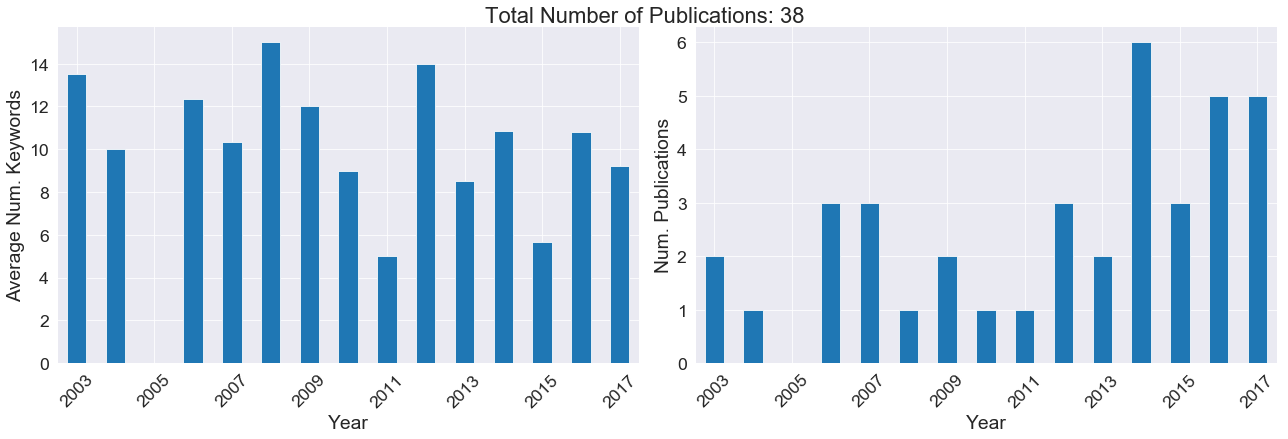

In [21]:
wos_plot.plot_kw_trend(all_uc_software)

In [22]:
software_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_uc_software))

In [34]:
software_phrases.display_phrases()

Uncertainty analysis of hydrologic and water quality predictions for a small watershed using SWAT2000 (2003) 
https://dx.doi.org/10.1080/714044368 

     Probability distribution functions (pdfs) for each of the  model simulations were constructed from these results. 

     This technique is applied to the Warner Creek watershed located in the Piedmont physiographic region of Maryland, and it provides an interval estimate of a range of values with an associated probability instead of a point estimate of a particular pollutant constituent. 

     Developed probability distribution functions for the model provided information with desirable probability. 

     The uncertainty in predicted stream flow and sediment loading is large, but that for nutrient loadings is the same as that of the corresponding input parameters. 

     In this study, ARRAMIS (Advanced Risk & Reliability Assessment Model) software package was used to analyze the uncertainty of the SWAT (Soil and Water Assessment To

     This paper introduces a framework for estimating stationary and non-stationary return levels, return periods, and risks of climatic extremes using Bayesian inference. 

     NEVA includes posterior probability intervals (uncertainty bounds) of estimated return levels through Bayesian inference, with its inherent advantages in uncertainty quantification. 

     This framework is implemented in the Non-stationary Extreme Value Analysis (NEVA) software package, explicitly designed to facilitate analysis of extremes in the geosciences. 


UNCERTAINTY QUANTIFICATION IN DAMAGE MODELING OF HETEROGENEOUS MATERIALS (2013) 
https://dx.doi.org/10.1615/IntJMultCompEng.2013005821 

     The epistemic and aleatory uncertainties inherent in the model prediction due to model parameter uncertainty, model form error, solution approximations, and measurement errors are investigated. 


The Influence of Uncertainty in Body Segment Mass on Calculated Joint Moments and Muscle Forces (2016) 
https://dx.

     The resulting model uncertainty is, however, rarely communicated to the user, so that current SDSSs yield clear, but therefore sometimes deceptively precise outputs. 

     These models usually simulate complex spatio-temporal phenomena, with input variables and parameters that are often hard to measure. 

     It is shown how the uncertainty of the input variables and model parameters effects the model outcomes. 


Aeras: A Next Generation Global Atmosphere Model (2015) 
https://dx.doi.org/10.1016/j.procs.2015.05.478 

     We present early UQ and performance portability results for the shallow water equations. 


Probabilistic approach for decay heat uncertainty estimation using URANIE platform and MENDEL depletion code (2014) 
https://dx.doi.org/10.1015/snamc/201402409 

     ORIGEN, FISPACT, DARWIN/PEPIN are part of them. 

     The purpose of this paper is to present a probabilistic approach to assess decay heat uncertainty due to the decay data uncertainties from nuclear dat